# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


In [9]:
import scipy.io as sio 
import scipy as sc
import numpy as np
import pandas as pd

#Load the data and assign it to a variable:
WineData = sio.loadmat('wine.mat')
print(WineData)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb 20 16:44:10 2014', '__version__': '1.0', '__globals__': [], 'X': array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]]), 'attributeNames': array([[array(['Fixed acidity'], dtype='<U13'),
        array(['Volatile acidity'], dtype='<U16'),
        array(['Citric acid'], dtype='<U11'),
        array(['Residual sugar'], dtype='<U14'),
        array(['Chlorides'], dtype='<U9'),
        array(['Free sulfur dioxide'], dtype='<U19'),
        array(['Total sulfur dioxide'], dtype='<U20'),
        array(['Density'], dtype='<U7'), array(['pH'], dtype='<U2'),
        array(['Sulphates'], dtype='<U9'),
        array(['Alcohol'], dtype

In [13]:
import scipy.stats as scst
import matplotlib.pyplot as plt
#So before we actually start plotting we need to standardize the data. 
#We can do this using the scipy.stats.zscore() function.
WineDataDF = pd.DataFrame.from_dict(WineData['X'])

WineDataTRSP = np.transpose(WineData['X'])

WineDataSTD = scst.zscore(WineDataTRSP) 



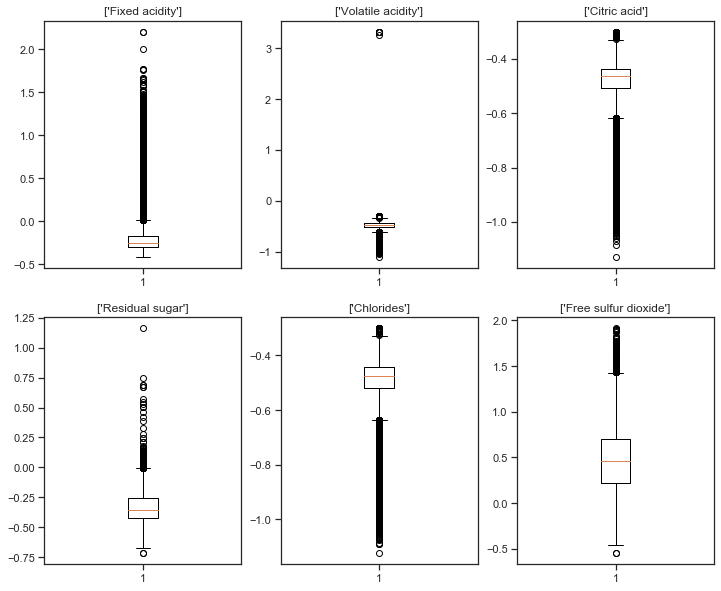

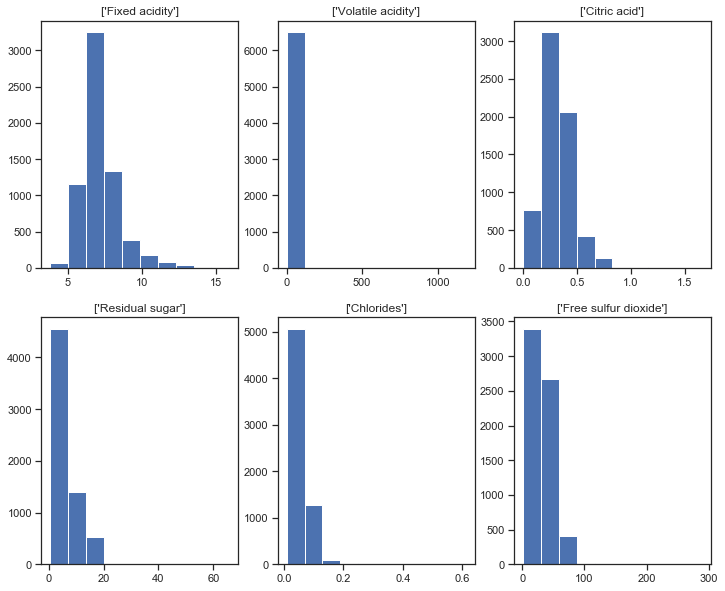

In [302]:
#I will make a subplot for the first 6 and last 6 attributes. 
#If i make the subplot any larger it will no longer be readable. 


#Visualising the data in boxplots:
f, axs = plt.subplots(2, 3, figsize=(12, 10))

axs = axs.ravel()

for i in range(6):
    axs[i].boxplot(WineDataSTD[i])
    axs[i].set_title(WineData['attributeNames'][0][i])

#Visualising the same data in histograms:
f, axs = plt.subplots(2, 3, figsize=(12, 10))

axs = axs.ravel()

for i in range(6):
    axs[i].hist(WineDataDF[i])
    axs[i].set_title(WineData['attributeNames'][0][i])
    


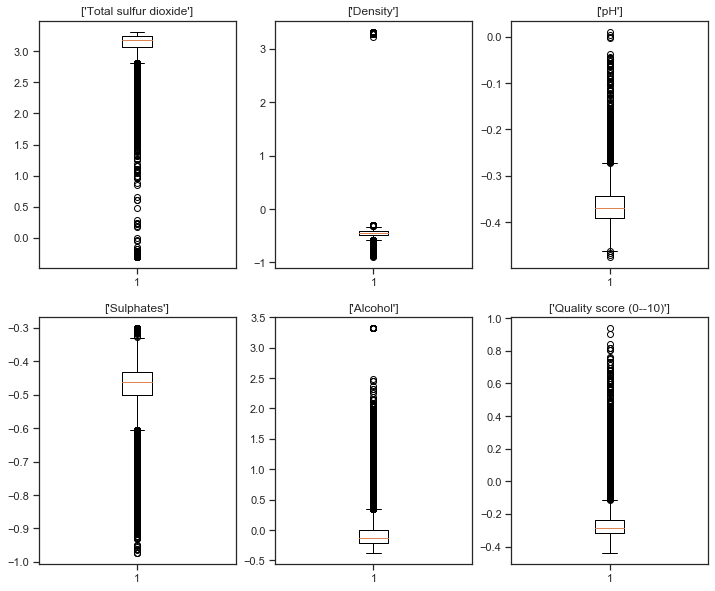

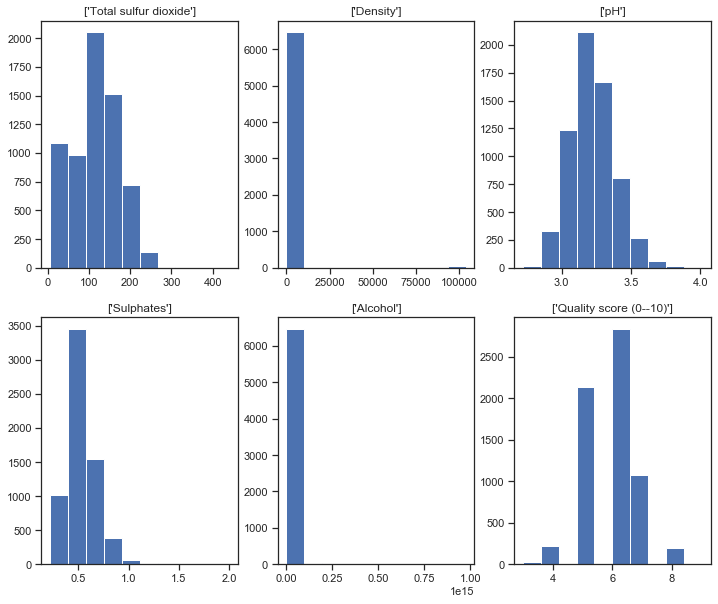

In [303]:
f, axs = plt.subplots(2, 3, figsize=(12, 10))

axs = axs.ravel()

for i in range(6):
    axs[i].boxplot(WineDataSTD[i+6])
    axs[i].set_title(WineData['attributeNames'][0][i+6])

    
#Visualising the same data in histograms:
f, axs = plt.subplots(2, 3, figsize=(12, 10))

axs = axs.ravel()

for i in range(6):
    axs[i].hist(WineDataDF[i+6])
    axs[i].set_title(WineData['attributeNames'][0][i+6])


In the Above boxplots we can see clear outliers. We can also see these when we plot the histograms.

In [304]:
#To safely remove the outliers we consider a value factor 10 greater than the largest factor we expect a outlier. 
#To check what are the biggest values we will use max()
print(max(WineDataTRSP[1]))
print(max(WineDataTRSP[5]))
print(max(WineDataTRSP[10]))


1185.0
289.0
973333333333333.0


In [19]:
#the attribute volatile acidity is in index: 1  
#We expect a value around: 0-2 g/dm3, So a outliers is factor 10 * 2= 20 
VAindex = np.where(WineDataDF[1] > 20)[0]

#density is in index: 5
#We expect density to be close to 1 g/cm3
DensityIndex = np.where(WineDataDF[5] > 10)[0]

#alcohol percentage is in index: 10
#We expect alcohol percentage to be somewhere between 5-20% vol
APIndex = np.where(WineDataDF[10] > 200)[0]

print(VAindex)
print(DensityIndex)
print(APIndex)

indexes = np.concatenate((VAindex, DensityIndex, APIndex))

[ 690  705  710  724 1012 3550]
[   0    1    2 ... 6494 6495 6496]
[1359 1362 1439 1441 1475 1514 5914 5918 5922 5940 5952 5955 5957 5963
 5968 5971 5976 5979 5982 6002 6009 6034 6106 6214 6235 6236 6253 6254
 6255 6262 6263 6270 6271 6273 6333 6417 6453 6463 6478 6479]


In [20]:
#Drop the indexes where a outlier was detected
WineDataDFCLND = WineDataDF.drop(indexes)

In [309]:
#So we need to standardize again because we deleted some data:

WineDataSTD = scst.zscore(WineDataDFCLND) 


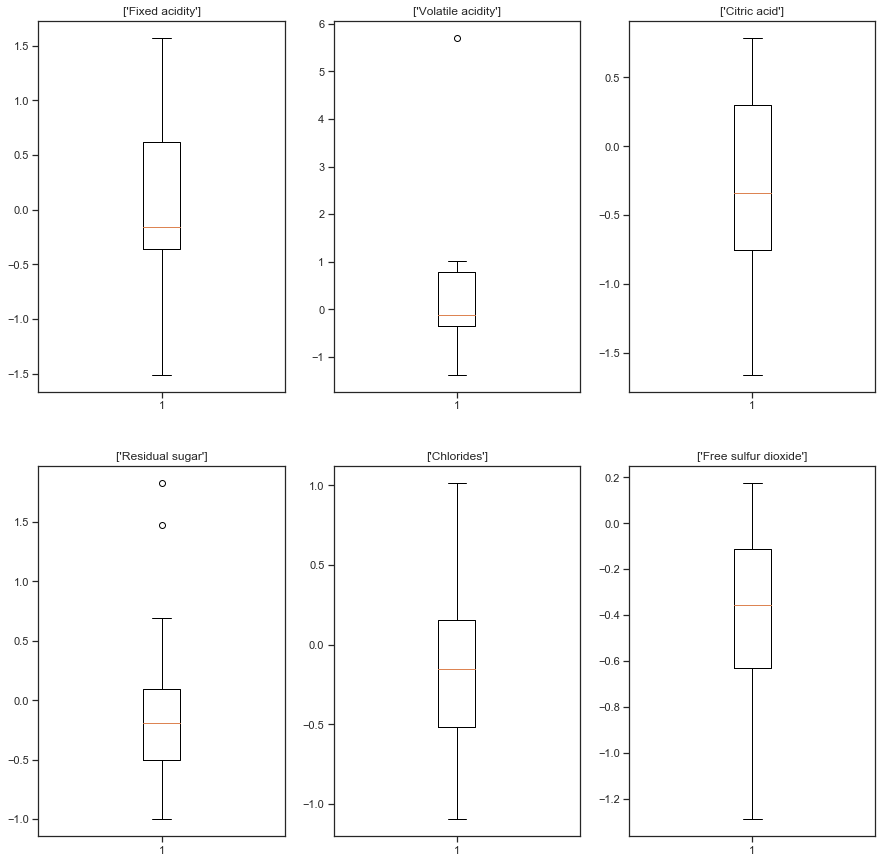

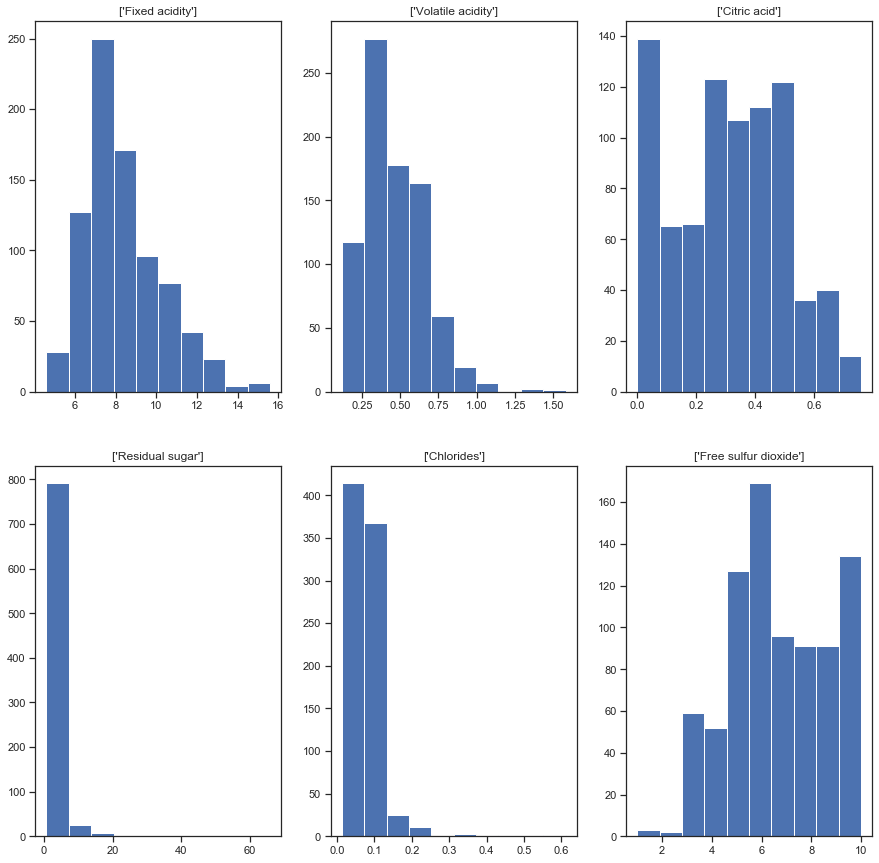

In [325]:
#So after we removed the outliers we will make the plots again and compare these to the initial ones. 
#Visualising the data in boxplots:
f, axs = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(15,15))

axs = axs.ravel()

for i in range(6):
    axs[i].boxplot(WineDataSTD[i])
    axs[i].set_title(WineData['attributeNames'][0][i])
    
    
#Visualising the same data in histograms:
f, axs = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(15,15))

axs = axs.ravel()

for i in range(6):
    axs[i].hist(WineDataDFCLND[i])
    axs[i].set_title(WineData['attributeNames'][0][i])



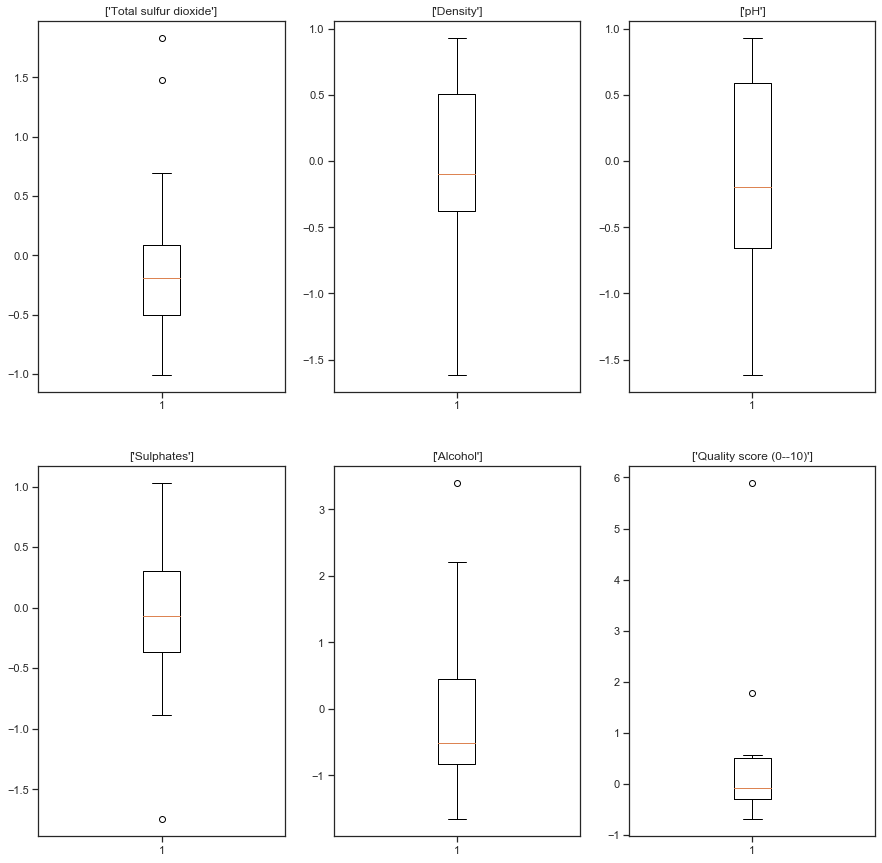

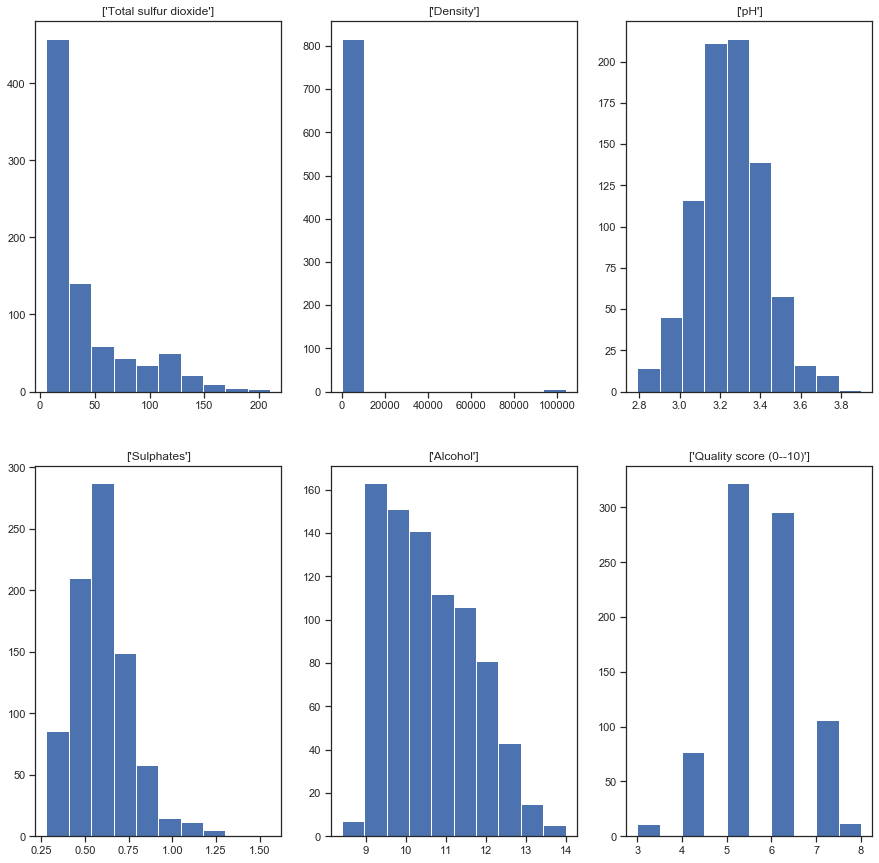

In [327]:
f, axs = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(15,15))

axs = axs.ravel()

for i in range(6):
    axs[i].boxplot(WineDataSTD[i+6])
    axs[i].set_title(WineData['attributeNames'][0][i+6])

    
#Visualising the same data in histograms:
f, axs = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(15,15))

axs = axs.ravel()

for i in range(6):
    axs[i].hist(WineDataDFCLND[i+6])
    axs[i].set_title(WineData['attributeNames'][0][i+6])

Comparing these we can see that: there is a big difference between before we deleted the outliers and after. Our plots are more accurate this way and we can't see any more (big) outlier. 


> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

We need to standardize the data after removing the outliers is because when we will be using the data for machine learning the error function can measure errors in distances from the data points. If the data is not standardized this means some attributes may weight bigger than others because the scale of the data can vary a lot. If the data is standardized, all the data is on the same scale.     

|> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

In [339]:
#So to look at correlation between whine features and the quality we will use a pearson test.
import scipy as sp
for i in range(12):
    print(WineData['attributeNames'][0][i])
    print(sp.stats.pearsonr(WineDataDFCLND[i], WineDataDFCLND[11]))


['Fixed acidity']
(0.27271135602038726, 1.613740704258025e-15)
['Volatile acidity']
(-0.21264531521685162, 7.028330138198547e-10)
['Citric acid']
(0.27688999198688774, 5.728119849614173e-16)
['Residual sugar']
(0.04681100908329146, 0.17945828167992578)
['Chlorides']
(0.07537207952517892, 0.030512025629898916)
['Free sulfur dioxide']
(0.0009040969628250427, 0.9793266725805326)
['Total sulfur dioxide']
(-0.2236890381467784, 8.37007939202087e-11)
['Density']
(0.03620334383490608, 0.2992727776333857)
['pH']
(-0.03255114218314923, 0.35070514462959457)
['Sulphates']
(0.3586349557113296, 2.0499159202866104e-26)
['Alcohol']
(0.3338399828106195, 6.685771090985186e-23)
['Quality score (0--10)']
(1.0, 0.0)


So if we look at the scores above we can't really identify a very strong relationship. The highest correlation we can find is 0.3586349557113296 for the feature Sulphates and the second highest is alcohol with a correlation of 0.3338399828106195. Both these features do not correlate very high with the quality of the wine, however we can verify that there is some relationship.

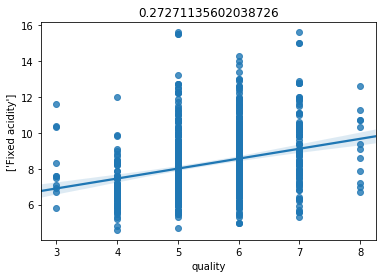

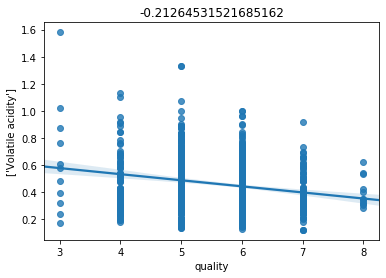

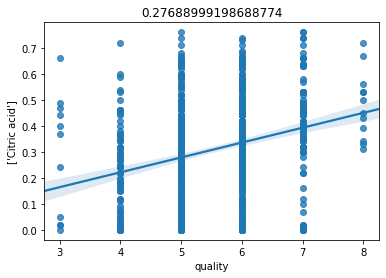

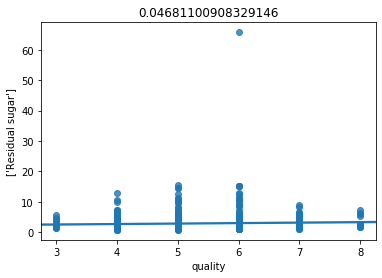

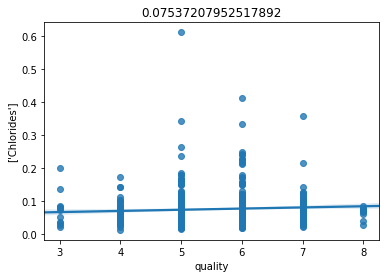

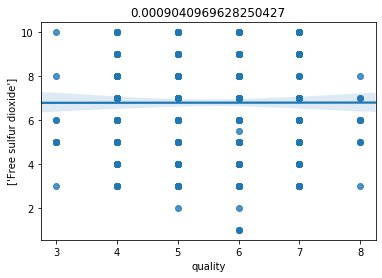

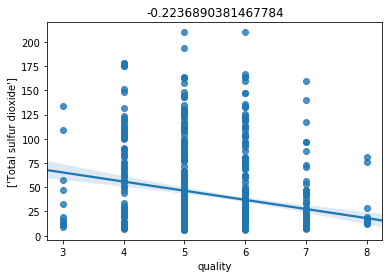

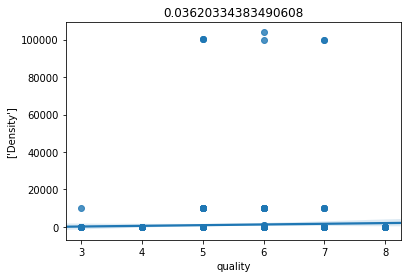

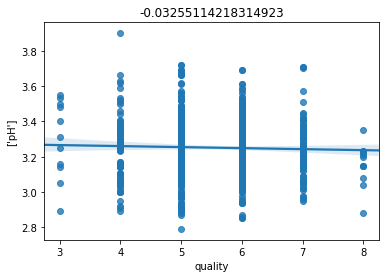

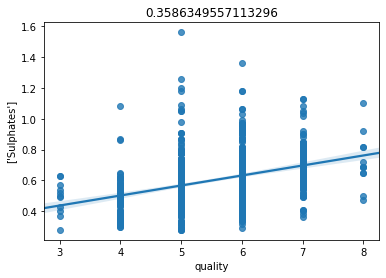

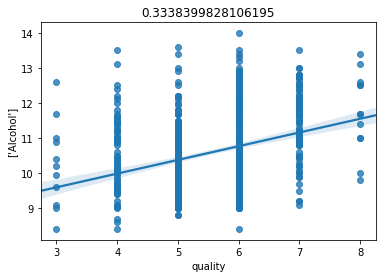

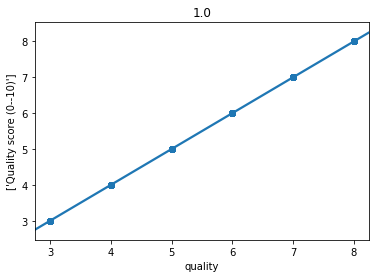

In [35]:
import seaborn as sns
#To visualize the correlations we will use a package calles seaborn and use the function regplot. 
    
for i in range(12):
    sns.regplot(WineDataDFCLND[11] , WineDataDFCLND[i])
    plt.xlabel('quality')
    plt.ylabel(str(WineData['attributeNames'][0][i]))
    plt.title(sp.stats.pearsonr(WineDataDFCLND[i], WineDataDFCLND[11])[0])
    plt.show()

If we look at the above plots we can't also really see big correlations between the features and the quality of the wine.

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


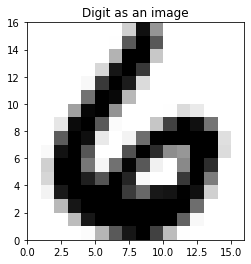

In [22]:
#EXAMPLE CODE
--------------------
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape 


# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat('zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Visualize the i'th digit as an image
plt.subplot(1,1,1);
I = reshape(X[i,:],(16,16))
plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
plt.title('Digit as an image');
plt.show()
#------------------------------------------------

In [191]:
#1
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape 

mat_data = loadmat('zipdata.mat')

traindata = mat_data['traindata']


In [192]:
#2
    #Class vector y containing only ones and zeros
y= traindata[:][:,0][traindata[:][:,0] < 2]

    #Data vector x containing the data from the digits one and zero
X = traindata[:][:][traindata[:][:,0] < 2]


np.shape(X)


(2199, 257)

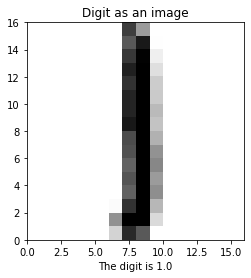

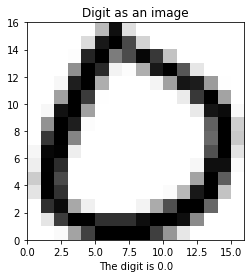

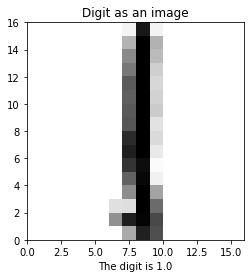

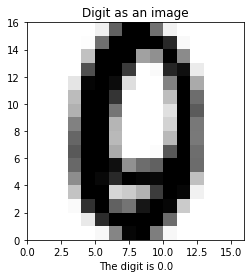

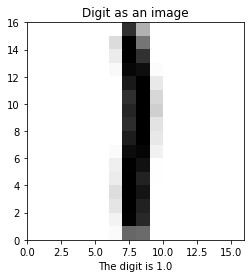

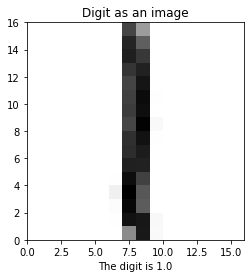

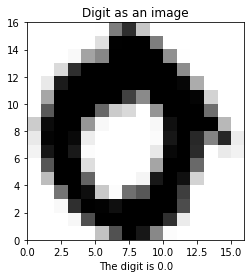

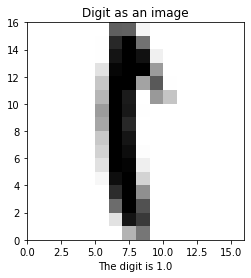

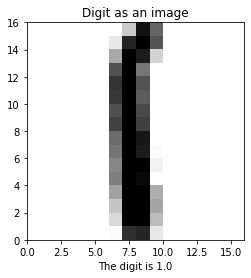

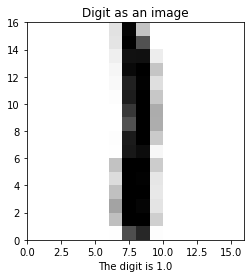

In [193]:
#3
#We will now visualize the first 10 digits.
for i in range(10):     
    # Visualize the i'th digit as an image
    plt.subplot(1,1,1);
    I = reshape(X[i,1:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
    plt.xlabel("The digit is " + str(y[i]));
    plt.show()

In [230]:
#Compute the singular values and vectors
U,sv,Vt = np.linalg.svd(X[:,1:])

#Since we will only look at the first 4 pca's we can disregard the rest
#Project data onto the 4 PCA's
Z = np.dot(X[:,1:],Vt.T[:,:4])


In [ ]:
#4
#Now to get the original data back on these four dimensions we can use the following calculation:*W** = Z*V[:,:4]T*
pca=Vt.T[:,:4]
W=np.dot(Z,pca.T)

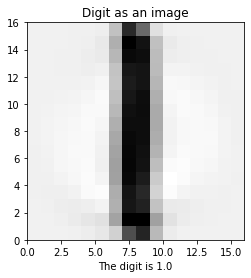

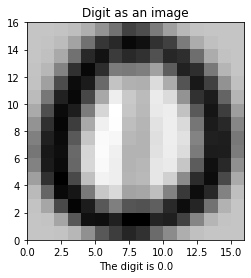

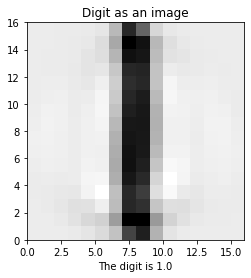

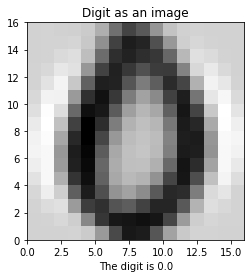

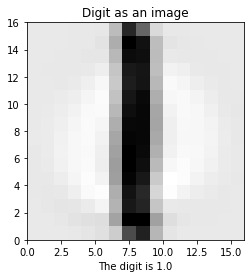

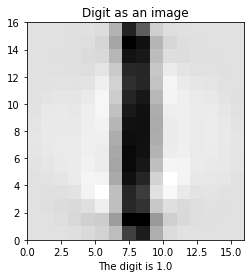

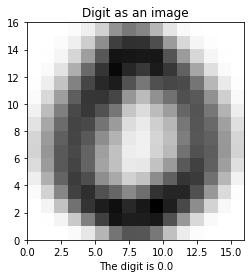

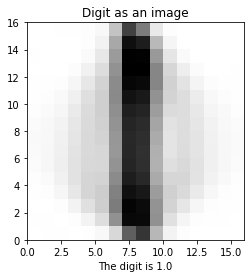

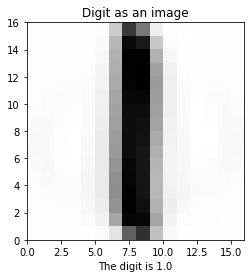

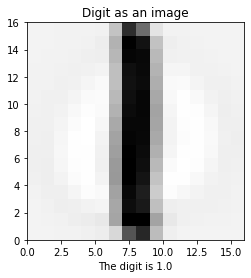

In [205]:
#3
#We will now visualize the first 10 digits.
i=0
for i in range(10):     
    # Visualize the i'th digit as an image
    plt.subplot(1,1,1);
    I = reshape(W[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
    plt.xlabel("The digit is " + str(y[i]));
    plt.show()


This is a really suprising result to me, we reduced the data onto the 4 principle components so the plotted data only exists of 4 dimensions instead of the original number of dimensions: 256. The digits are still readable and can still be identified. As a matter of fact, I would argue that the digits are more recognisable now then they were on the original data set. For some digits the noise was very much reduced, so you can recognise the most import part of the digit better. 

Though the digits projected on the 4 pca's contain less noise, they are also less sharp. This is most noticable with the zero's, the sharpness of the edges is greatly reduced.

----


----



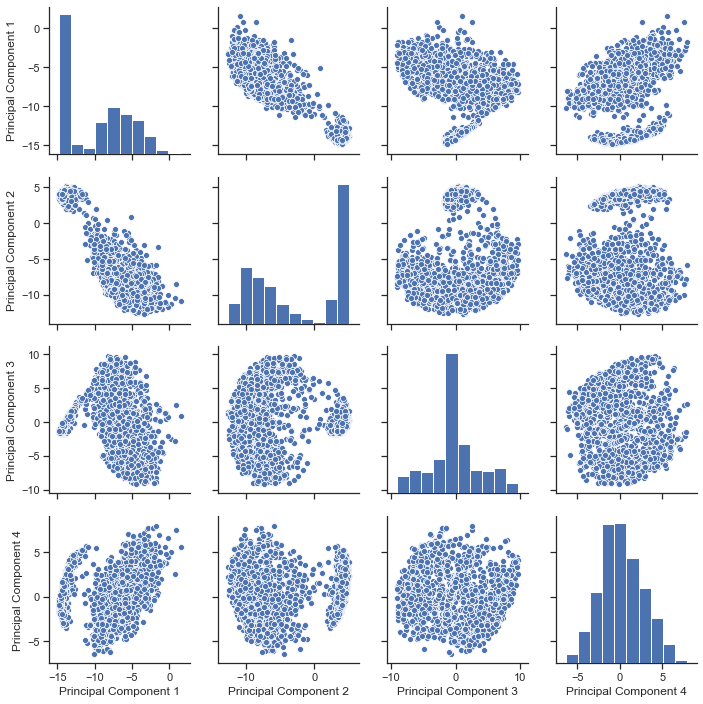

In [250]:
#5
#Now we will plot all the combinations of the pca's in a scatter plot.
#We can do this in a pairplot https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns; sns.set(style="ticks", color_codes=True)
Dataframe=pd.DataFrame(Z, columns=('Principal Component 1', 'Principal Component 2','Principal Component 3','Principal Component 4'))
sns.pairplot(Dataframe)



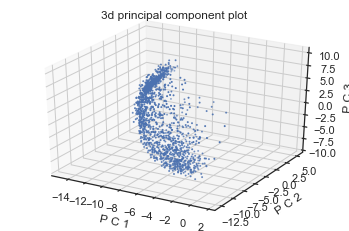

In [249]:
import mpl_toolkits.mplot3d as plot3d
#Below is the 3d plot of the principal components combined

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(Z[:,0],Z[:,1],Z[:,2], s=1)


ax.set_xlabel('P C 1')
ax.set_ylabel('P C 2')
ax.set_zlabel('P C 3')
ax.set_title('3d principal component plot')
plt.show()

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [1]:
import numpy as np
#To find the mean and the standard deviation we will be using the functions: numpy.ndarray.mean() and numpy.ndarray.std()
#First we define the array of values.
limbs = np.array([2,3,6,8,11,18])
print(np.ndarray.mean(limbs))
print(np.ndarray.std(limbs))




8.0
5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [16]:
from itertools import combinations 
from random import sample 

alienCombi2 = np.array([list(combinations(limbs,2))])

#The amount of combinations are: 
print(alienCombi2)



alienCombi4 = np.array([list(combinations(limbs,4))])

#The amount of combinations are: 
print(alienCombi4)




[[[ 2  3]
  [ 2  6]
  [ 2  8]
  [ 2 11]
  [ 2 18]
  [ 3  6]
  [ 3  8]
  [ 3 11]
  [ 3 18]
  [ 6  8]
  [ 6 11]
  [ 6 18]
  [ 8 11]
  [ 8 18]
  [11 18]]]
[[[ 2  3  6  8]
  [ 2  3  6 11]
  [ 2  3  6 18]
  [ 2  3  8 11]
  [ 2  3  8 18]
  [ 2  3 11 18]
  [ 2  6  8 11]
  [ 2  6  8 18]
  [ 2  6 11 18]
  [ 2  8 11 18]
  [ 3  6  8 11]
  [ 3  6  8 18]
  [ 3  6 11 18]
  [ 3  8 11 18]
  [ 6  8 11 18]]]


In [45]:
ListOfSampleMeans2 = np.array([])

#Find each mean for every sample (size 2) 
for i in range(0,15):
    ListOfSampleMeans2 = np.append(ListOfSampleMeans2,np.ndarray.mean(alienCombi2[0][i]))

print(ListOfSampleMeans2)

[ 2.5  4.   5.   6.5 10.   4.5  5.5  7.  10.5  7.   8.5 12.   9.5 13.
 14.5]


In [46]:
ListOfSampleMeans4 = np.array([])

#Find each mean for every sample (size 4) 
for i in range(0,15):
    ListOfSampleMeans4 = np.append(ListOfSampleMeans4,np.ndarray.mean(alienCombi4[0][i]))

print(ListOfSampleMeans4)

[ 4.75  5.5   7.25  6.    7.75  8.5   6.75  8.5   9.25  9.75  7.    8.75
  9.5  10.   10.75]


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [47]:
#SAMPLE SIZE 2
#Mean of the sample size 
print(np.ndarray.mean(ListOfSampleMeans2))
#Std of the sample means
print(np.ndarray.std(ListOfSampleMeans2))

8.0
3.40587727318528


In [48]:
#SAMPLE SIZE 4    
#Mean of the sample size 
print(np.ndarray.mean(ListOfSampleMeans4))
#Std of the sample means
print(np.ndarray.std(ListOfSampleMeans4))

8.0
1.70293863659264


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

i) The central limit theorem states that when you take more samples, especially large ones, your sample means will look more like a normal distribution. So, our mean of the population is 8.0. 

The mean of all the sample means for sample size = 4 is: 8.0
The standard deviation of the sample means for sample size = 2 is: 3.40587727318528 

The mean of all the sample means for sample size = 4 is: 8.15
The standard deviation of the sample means for sample size = 4 is: 1.70293863659264


These means of the sample means are for both sample sizes pretty close to the actual mean of the population.  

ii)
For sample size 2: 
    Population standard deviation: 5.385164807134504
    Square root of the samplesize: sqrt(2)
    Standard deviation of the sample means: 3.40587727318528
    M = 6

    5.385164807134504 / sqrt(2) * sqrt((6-2) / (6-1)) = 3.406

    So this value of 3.406 is very close to 3.40587727318528.  

For sample size 4:
    Population standard deviation: 5.385164807134504
    Square root of the samplesize: sqrt(4)
    Standard deviation of the sample means: 1.70293863659264
    M = 6

    5.385164807134504 / sqrt(4) * sqrt((6-4) / (6-1)) = 1.703

    This value is also almost equal to 1.70293863659264.

    We can see that for both value the error margin from the function is around 0.2. 


> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

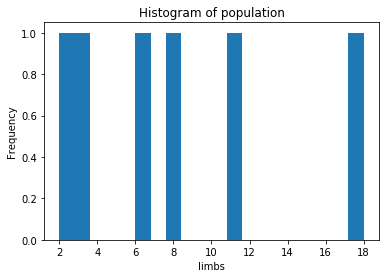

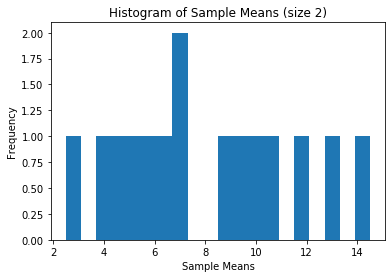

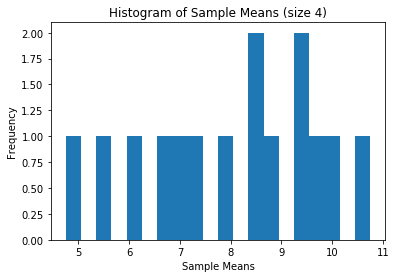

In [49]:
import matplotlib.pyplot as plt
#Plotting the population
plt.hist(limbs, bins=20)
plt.xlabel("limbs")
plt.ylabel("Frequency")
plt.title("Histogram of population")
plt.show()

#Plotting the sample means:
plt.hist(ListOfSampleMeans2, bins=20)
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means (size 2)")
plt.show()

#Plotting the sample means:
plt.hist(ListOfSampleMeans4,bins=20)
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means (size 4)")
plt.show()


As the sample size increases, we can see that the distribution of the sample means moves closer to the middle, in other words the standard deviation gets smaller. We can see in the histogram of the means of the samples with sample size 2 that the data points vary from 2.5 to 14.5. And the data points of sample size 4 vary from 4.75 to 10.75. If we look at the standard deviation we can also see a noticiable difference: 3.40587727318528 (size 2) and 1.70293863659264 (size 4)
